Sample code for AIRI400 Perceptron class.
The original code comes from Sebastian Reschka's blog (http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html).<br/>
Slightly modified for the lecture. -skimaza

In [1]:
import numpy as np

In [2]:
weights = []
errors_log = []
epochs = 50
eta = 0.01

In [3]:
def train(X, y, epochs=epochs, eta=eta):
    global weights
    global errors_log
    weights = np.zeros(1 + X.shape[1])
    print("Initial weights", weights)
    errors_log = []

    for i in range(epochs):
        errors = 0
        print("EPOCHS", i+1)
        for xi, target in zip(X, y):
            update = eta * (target - predict(xi))
            print(xi, "target", target, "sum", net_input(xi), "update", update)
            if update != 0:
                weights[1:] +=  update * xi
                weights[0] +=  update
                print("Updated WEIGHTS", weights)
                errors += int(update != 0.0)
        errors_log.append(errors)
    return

def net_input(X):
    global weights
    return np.dot(X, weights[1:]) + weights[0]

def predict(X):
    return np.where(net_input(X) >= 0.0, 1, -1)

In [4]:
import pandas as pd

In [5]:
import os
from urllib.request import urlopen

IRIS_DATA = "iris.dat"
if not os.path.exists(IRIS_DATA):
    raw = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').read()
    with open(IRIS_DATA, "wb") as f:
        f.write(raw)

In [7]:
df = pd.read_csv(IRIS_DATA, header=None)

In [8]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

In [9]:
train(X2, y2, epochs=25, eta=0.01)

Initial weights [ 0.  0.  0.]
EPOCHS 1
[ 3.2  1.4] target 1 sum 0.0 update 0.0
[ 3.2  1.5] target 1 sum 0.0 update 0.0
[ 3.1  1.5] target 1 sum 0.0 update 0.0
[ 2.3  1.3] target 1 sum 0.0 update 0.0
[ 2.8  1.5] target 1 sum 0.0 update 0.0
[ 2.8  1.3] target 1 sum 0.0 update 0.0
[ 3.3  1.6] target 1 sum 0.0 update 0.0
[ 2.4  1. ] target 1 sum 0.0 update 0.0
[ 2.9  1.3] target 1 sum 0.0 update 0.0
[ 2.7  1.4] target 1 sum 0.0 update 0.0
[ 2.  1.] target 1 sum 0.0 update 0.0
[ 3.   1.5] target 1 sum 0.0 update 0.0
[ 2.2  1. ] target 1 sum 0.0 update 0.0
[ 2.9  1.4] target 1 sum 0.0 update 0.0
[ 2.9  1.3] target 1 sum 0.0 update 0.0
[ 3.1  1.4] target 1 sum 0.0 update 0.0
[ 3.   1.5] target 1 sum 0.0 update 0.0
[ 2.7  1. ] target 1 sum 0.0 update 0.0
[ 2.2  1.5] target 1 sum 0.0 update 0.0
[ 2.5  1.1] target 1 sum 0.0 update 0.0
[ 3.2  1.8] target 1 sum 0.0 update 0.0
[ 2.8  1.3] target 1 sum 0.0 update 0.0
[ 2.5  1.5] target 1 sum 0.0 update 0.0
[ 2.8  1.2] target 1 sum 0.0 update 0.0
[ 2

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

pos = X2[[y2 == 1]]
neg = X2[[y2 == -1]]

In [11]:
min_x = min(X2[:,0])
max_x = max(X2[:,0])
print(min_x, max_x)

2.0 3.8


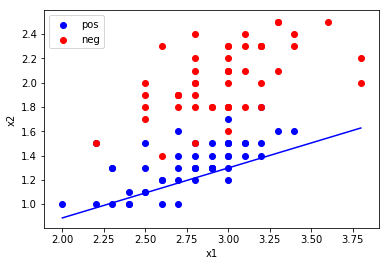

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

point_x = np.array([min_x, max_x])
point_y = np.array([- (weights[0]+weights[1]*min_x)/weights[2], - (weights[0]+weights[1]*max_x)/weights[2]])

line, = ax.plot(point_x, point_y, 'b-', picker=5)

ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

plt.show()

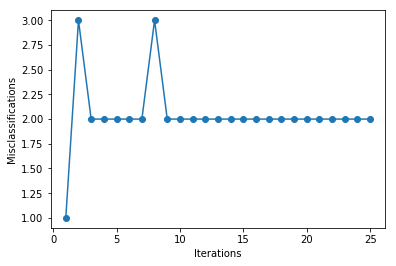

In [13]:
plt.plot(range(1, len(errors_log)+1), errors_log, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [14]:
print(errors_log)

[1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [15]:
print('Total number of misclassifications: %d of 100' % (y2 != predict(X2)).sum())

Total number of misclassifications: 43 of 100
